In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Youngův modul pružnosti - roztažnost věcí kolem nás

Cílem tohoto cvičení je seznámení se s jednoduchým modelem deformace.

Youngův modul (nebo modul pružnosti v tahu) $E$, je materiálová konstanta popisující poměr mezi napětím v tahu $\sigma$ a poměrným prodloužením pod napětím $\varepsilon$. 

\begin{equation*}
    E = \frac{\sigma}{\varepsilon}
\end{equation*}


Napětí v tahu $\sigma$ je fyzikální veličina která je definovaná jako poměr velikosti síly $F$ na plochu ku ploše na kterou tato síla působí $S$
\begin{equation*}
    \sigma = \frac{F}{S}.
\end{equation*}
Jako příklad si můžeme představit válec s podstavou o obsahu plochy $S$, na kterou působíme silou $F$. Čím bude průřez válce $S$ užší, tím větší bude napětí v tahu $\sigma$ a naopak. Pro sílu platí přímá uměra - čím větší síla $F$, tím větší napětí v tahu $\sigma$ a čím menší síla $F$, tak tím menší i napětí v tahu $\sigma$. 

Poměrné prodloužení $\varepsilon$ je poměr mezi prodloužením (nebo zkrácením) objektu $\Delta l$, které je podrobeno vější síle, která jej deformuje a jeho původní délkou $l$
\begin{equation*}
    \varepsilon = \frac{\Delta l}{l}.
\end{equation*}
Výslek je tedy prodloužení objektu vyjádřené v poměru vůči původní délce $l$ (při prodloužení $\Delta l = l$ je relativní prodloužení $\varepsilon = 1$). Proto jej nazýváme "poměrné".

Tento náš model k popisu deformace objektů funguje jen pro mále deformace a v případě kdy je závislost poměrného prodloužení $\varepsilon$ na napětí v tahu $\sigma$ lineární.

<img src="diagram_prelozeny.png" width="700"/>

Na obrázku výše můžeme vidět typický průběch závislosti napětí v tahu $\sigma$ (na obrázku jako $R$) na poměrném prodloužení $\varepsilon$ tzv. tahový diagram. V první části od počátku grafu až do meze úměrnosti je závislost lineární. To je přesně ta oblast ve které náš model deformace funguje.

https://en.wikipedia.org/wiki/Young%27s_modulus \
https://sk.wikipedia.org/wiki/Youngov_modul

In [3]:
# Načtení dat o modulech průžnosti různých materiálů

data = pd.read_table("data_wiki.txt", sep = "\t")

# Zdroj dat
# https://en.wikipedia.org/wiki/Young%27s_modulus#Examples

Podívejme se na to, jak se bude prodlužovat zlatý váleček řetízek o různých průřezech. Platí vzorec $\varepsilon = \frac{\sigma}{E}$.

In [4]:
# Definujeme si funkci pro vypocet plochy (prurezu) z polomeru "r" 
def prurez(r):
    return(np.pi*r**2)

r = np.linspace(0.001,0.008,8)      # Rozsah prumeru nenkého valecku (v metrech)
S = prurez(r)

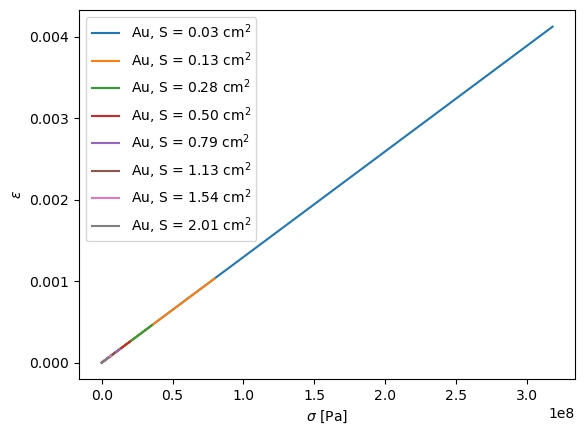

In [5]:
F = np.linspace(0,1000,1000)                                                                    #Rozsah síly 0-1000 N
gold_ym = float(data[data["Material"] == "Gold"]["Young's modulus (GPa)"].values[0])*10**9      #Youngův modul pro zlato převedený na pascaly

for i in range(len(S)):
    plt.plot(F/S[i], (F/S[i])/gold_ym, label = f"Au, S = {10**4*S[i]:,.2f} cm$^2$")

plt.xlabel(r"$\sigma$ [Pa]")
plt.ylabel(r"$\varepsilon$")

plt.legend()

Můžeme vidět, že zmenšení průřezu při zachování rozsahu síly $F$ se změnší maximální hodnota napětí v tahu a tím pádem i maximální prodloužení v tahu. Poďme se podívat na různé materiály!

In [6]:
coppper_ym = float(data[data["Material"] == "Copper (Cu), annealed"]["Young's modulus (GPa)"].values[0])*10**9      #Youngův modul pro měď převedený na pascaly
titanium_ym = float(data[data["Material"] == "Titanium (22Ti)"]["Young's modulus (GPa)"].values[0])*10**9           #Youngův modul pro titan převedený na pascaly
bronze_ym = float(data[data["Material"] == "Bronze"]["Young's modulus (GPa)"].values[0])*10**9                      #Youngův modul pro bronz převedený na pascaly
steel_ym = float(data[data["Material"] == "Steel, A36"]["Young's modulus (GPa)"].values[0])*10**9                   #Youngův modul pro ocel A36 převedený na pascaly

Předpokládejme, že vytvoříme ze všech našich materiálů (Zlato, měď, titan, bronz a ocel) tenký drát o průřezu $S = 1 \text{ mm}^2$. A budeme na jeden z jeho konců působit silou v rozsahu $F \in [0 \text{ N},1000 \text{ N}]$.

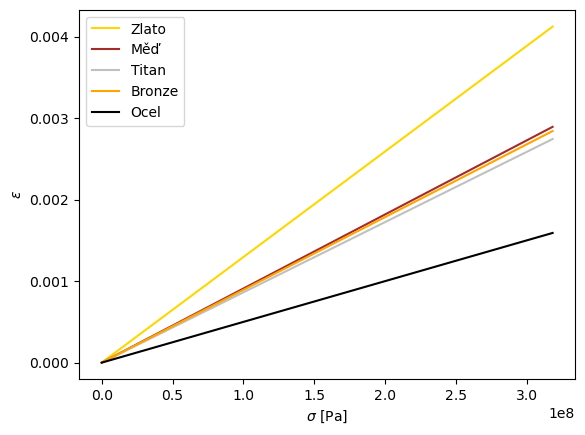

In [7]:
S = prurez(0.001)

plt.plot(F/S, (F/S)/gold_ym, label = f"Zlato", color = "gold")
plt.plot(F/S, (F/S)/coppper_ym, label = f"Měď", color = "brown")
plt.plot(F/S, (F/S)/titanium_ym, label = f"Titan", color = "silver")
plt.plot(F/S, (F/S)/bronze_ym, label = f"Bronze", color = "orange")
plt.plot(F/S, (F/S)/steel_ym, label = f"Ocel", color = "black")

plt.xlabel(r"$\sigma$ [Pa]")
plt.ylabel(r"$\varepsilon$")

plt.legend()

Z tohoto grafu můžeme vidět, že ocel (A36) je materiál, který se prodlužuje nejméňe. To je také důvod proč se ocel používá pro ve stavebnictví. 